Preface: This is a data set from the StockX website, a marketplace for streetwear. It consists of a random sample of all Off-White x Nike and Yeezy 350 sales from between 9/1/2017 (the month that Off-White first debuted “The Ten” collection) and the present. I perform some exploratory data analysis and create a couple of features before doing further visualizations in Tableau.  
[Link to contest description](https://stockx.com/news/the-2019-data-contest/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Load Data from excel 

In [2]:
sales = pd.read_excel('StockX-Data-Contest-2019-3.xlsx', sheet_name='Raw Data')

In [3]:
sales.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


Quick Ideas
1. map buyer region -> done in Tableau - not particularly revealing 
2. pull out color/type of shoe from name -> did not do color, only type of shoe
3. sale price/retail price % -> "Markup"
4. these are collectable shoes -> So sale price > retail price and presumably no discounts
5. anything with shoe size? Bigger than size 15 are more expensive (but very small sample size)
6. time between order and release -> "Days 

# Data validation

In [4]:
sales.dtypes

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price             float64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object

In [5]:
# looks like no missing values
sales.count()

Order Date      99956
Brand           99956
Sneaker Name    99956
Sale Price      99956
Retail Price    99956
Release Date    99956
Shoe Size       99956
Buyer Region    99956
dtype: int64

In [6]:
# confirm brans are as expected
sales['Brand'].value_counts()
# Off-White: Italian streetwear and luxury fashion label
# Yeezy: Kanye Adidas

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64

In [7]:
# numeric columns 
sales.describe()

,Sale Price,Retail Price,Shoe Size
count,99956.000000,99956.00000,99956.000000
mean,446.634754,208.61359,9.344181
std,255.982918,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


In [8]:
# string columns 
sales[['Brand', 'Sneaker Name', 'Buyer Region']].describe()

,Brand,Sneaker Name,Buyer Region
count,99956,99956,99956
unique,2,50,51
top,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,California
freq,72162,11423,19349


In [9]:
sales.groupby('Brand')['Sneaker Name'].nunique()

Brand
 Yeezy       20
Off-White    30
Name: Sneaker Name, dtype: int64

In [10]:
# Get sense of unique shoe designs
# for name, grp in sales.groupby('Brand'):
#     print(name, grp['Sneaker Name'].unique())

In [11]:
# Date Columns 
sales[['Order Date', 'Release Date']].describe()

,Order Date,Release Date
count,99956,99956
unique,531,35
top,2018-11-16 00:00:00,2018-06-30 00:00:00
freq,1388,11423
first,2017-09-01 00:00:00,2015-06-27 00:00:00
last,2019-02-13 00:00:00,2019-02-07 00:00:00


# Column EDA

Start with buyer region

In [12]:
top5_cnt_all = sales.groupby('Buyer Region')['Sale Price']\
                      .agg(['count', 'mean'])\
                      .sort_values('count', ascending=False)\
                      .reset_index()[:5]
top5_cnt_all

,Buyer Region,count,mean
0,California,19349,478.248223
1,New York,16525,442.767124
2,Oregon,7681,469.550942
3,Florida,6376,445.425605
4,Texas,5876,417.249155


In [13]:
top5_mean_all = sales.groupby('Buyer Region')['Sale Price']\
                      .agg(['count', 'mean'])\
                      .sort_values('mean', ascending=False)\
                      .reset_index()[:5]
top5_mean_all

,Buyer Region,count,mean
0,Delaware,1242,503.335348
1,Hawaii,383,488.966057
2,Nevada,790,485.824051
3,California,19349,478.248223
4,Oregon,7681,469.550942


In [14]:
top_states = set(list(top5_mean_all['Buyer Region'].unique()) + list(top5_cnt_all['Buyer Region'].unique()))

In [15]:
top_states_sales = sales[sales['Buyer Region'].isin(top_states)]

In [16]:
sales_by_state = sales.groupby('Buyer Region')['Sale Price']\
                      .agg(['count', 'mean'])\
                      .reset_index()

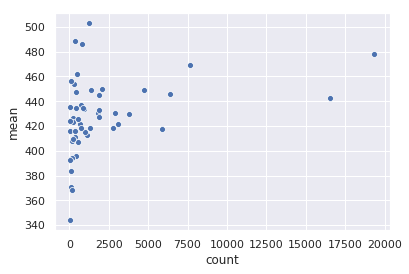

In [17]:
sns.scatterplot(x='count', y='mean', data=sales_by_state)

Notes on Region:
1. Delaware had highest mean sale price 
2. CA and NY had the highest sale volume
3. CA and OR top 5 in both

Look at distributions of numeric columns

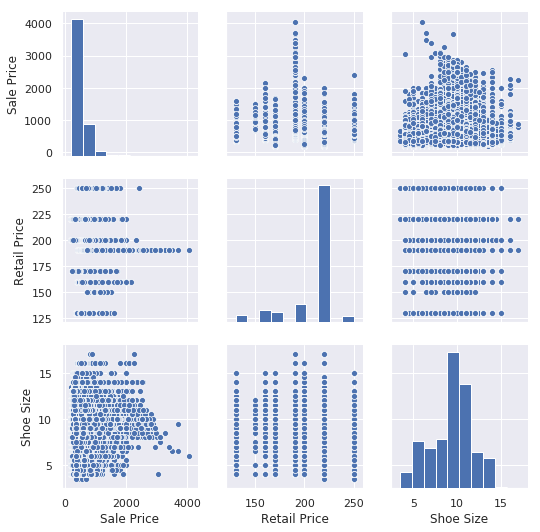

In [18]:
sns.pairplot(sales)

Calculate Markup

In [19]:
# how much over the retail price
sales['Markup'] = sales['Sale Price']/sales['Retail Price']

In [20]:
sales.groupby(['Brand','Retail Price'])['Markup'].describe()
# what are these 200 Yeezys & 150

count      mean       std       min       25%  \
Brand     Retail Price                                                    
 Yeezy    200             455.0  5.271879  1.338598  3.375000  4.380000   
          220           71707.0  1.616486  0.597129  0.845455  1.218182   
Off-White 130            3622.0  4.637523  1.042357  2.776923  3.984615   
          150              31.0  6.503441  1.432040  4.733333  5.420000   
          160            6361.0  4.418828  1.426060  2.450000  3.543750   
          170            5471.0  2.386895  0.978618  1.235294  1.711765   
          190            7095.0  5.087570  2.233102  2.215789  3.773684   
          200            1785.0  1.839894  0.540733  1.015000  1.450000   
          250            3429.0  2.586011  0.552772  1.600000  2.280000   

                             50%       75%        max  
Brand     Retail Price                                 
 Yeezy    200           4.900000  5.747500  11.500000  
          220           1.431818  1.809091   9.090909  
Off-White 130           4.423077  4.998077  12.307692  
          150           6.333333  7.366667  10.000000  
          160           4.081250  4.718750  13.500000  
          170           2.176471  2.808824  10.000000  
          190           4.347368  5.373684  21.315789  
          200           1.740000  1.995000   4.500000  
          250           2.420000  2.680000   9.596000

/home/douglas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


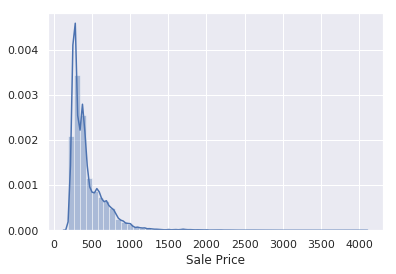

In [21]:
sns.distplot(sales['Sale Price'])

/home/douglas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


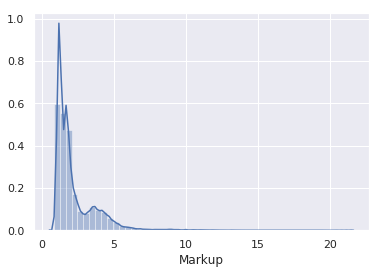

In [22]:
sns.distplot(sales['Markup'])
# second peak for the highly marked up group

Numeric Notes
1. Yeezys are the dominant brand overall - has trends changed through time?
2. Select retail price range have higher markups than others - are these specific shoes?
3. Are prices normally distributed within their own sneaker type?
4. Significant price difference based on color?

# Date Features

Days before/after release: How does it affect markup and demand?

In [23]:
sales['days_after_release'] = (sales['Order Date'] - sales['Release Date']).dt.days
# store as int rather than date interval

In [24]:
sales['days_after_release'].describe()

count    99956.000000
mean       183.708722
std        232.354142
min        -69.000000
25%         10.000000
50%         56.000000
75%        345.000000
max       1321.000000
Name: days_after_release, dtype: float64

In [25]:
# pre release sales
pre_release = sales[sales['days_after_release'] < 0]
pre_release['Markup'].describe()

count    5601.000000
mean        3.341027
std         1.746056
min         1.136364
25%         1.700000
50%         3.264706
75%         4.500000
max        19.368421
Name: Markup, dtype: float64

/home/douglas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


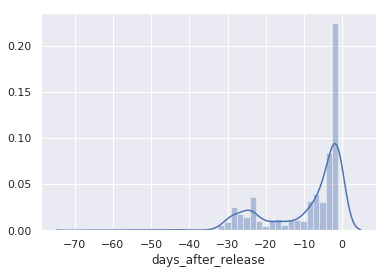

In [26]:
sns.distplot(pre_release['days_after_release'])
# most presales are right before release 

In [27]:
sales['Period'] = sales['Order Date'].dt.to_period('M')

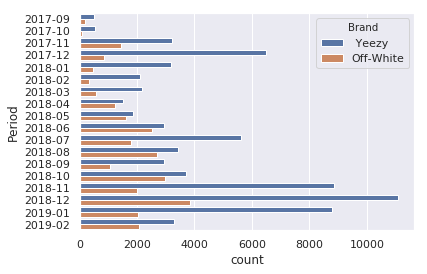

In [28]:
sns.countplot(y=sales['Period'], hue=sales['Brand'])

In [29]:
# # consider separating out close to release date 
# for name, grp in sales.groupby('Brand'):
#     print(name, grp['Release Date'].unique())
    

In [30]:
sales.pivot_table(values='Markup', index='Period', columns='Brand', aggfunc='mean', margins=True)
# off white looks like it has better resale value 
# are there particular shoes/outliers that are driving Yeezys down? or off white up? 

Brand,Yeezy,Off-White,All
Period,,,
2017-09,3.074860,6.861547,4.063636
2017-10,3.111935,6.712850,3.631411
2017-11,2.301903,3.946458,2.809364
2017-12,1.848692,3.789500,2.075762
2018-01,1.929257,4.610942,2.283497
2018-02,2.029783,5.323197,2.484187
2018-03,2.121336,5.465788,2.829215
2018-04,2.209787,3.208223,2.662271
2018-05,2.153475,4.722293,3.349432


# Group similar sneakers together as "Shoe Lines"

In [31]:
names = list(sales['Sneaker Name'].unique())

In [32]:
# Explore to find out patterns in the names. 

In [33]:
[x for x in names if 'Low' in x][:3]

['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
 'Adidas-Yeezy-Boost-350-Low-Moonrock',
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016']

In [34]:
[x for x in names if 'V2' in x][:3]
# Adidas restock- low mark up but high volume good for company?

['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Green']

In [35]:
[x for x in names if 'Retro' in x]
# Jordan Retro

['Air-Jordan-1-Retro-High-Off-White-Chicago',
 'Air-Jordan-1-Retro-High-Off-White-White',
 'Air-Jordan-1-Retro-High-Off-White-University-Blue']

In [36]:
[x for x in names if 'Blue' in x]

['Adidas-Yeezy-Boost-350-V2-Blue-Tint',
 'Air-Jordan-1-Retro-High-Off-White-University-Blue']

In [37]:
sorted([x for x in names if 'Nike' in x])[:3]
# Nike Air Max, Nike Air Force, Blazer, Zoom-Fly, Nike Other

['Nike-Air-Force-1-Low-Off-White',
 'Nike-Air-Force-1-Low-Off-White-Black-White',
 'Nike-Air-Force-1-Low-Off-White-Volt']

In [38]:
sorted([x for x in names if 'Yeezy' in x])[:3]
# low, V2

['Adidas-Yeezy-Boost-350-Low-Moonrock',
 'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015']

In [39]:
def shoe_line(name):
    '''Assign shoe line to sneakers '''
    if 'Retro' in name:
        return 'Jordan-Retro'
    if '350-Low' in name:
        return 'Yeezy Low'
    if 'V2' in name:
        return 'Yeezy Restock'
    if 'Nike-Air-Max' in name:
        return 'Nike Air Max'
    if  'Nike-Air-Force' in name:
        return 'Nike Air Force'
    if 'Nike-Blazer' in name:
        return 'Nike Blazer'
    if 'Nike-Zoom-Fly' in name:
        return 'Nike Zoom Fly'
    else: 
        return 'Other'

In [40]:
sales['Shoe Line'] = sales['Sneaker Name'].map(shoe_line)

In [41]:
sales.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Markup,days_after_release,Period,Shoe Line
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,4.986364,342,2017-09,Yeezy Low
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,3.113636,282,2017-09,Yeezy Restock
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,3.136364,282,2017-09,Yeezy Restock
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,4.886364,282,2017-09,Yeezy Restock
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,3.763636,202,2017-09,Yeezy Restock


In [42]:
sales['Shoe Line'].value_counts()

Yeezy Restock     71209
Other              8276
Jordan-Retro       5703
Nike Zoom Fly      4317
Nike Blazer        3622
Nike Air Max       3390
Nike Air Force     2486
Yeezy Low           953
Name: Shoe Line, dtype: int64

# Export to csv for Tableau

In [43]:

# sales.to_csv('stockx.csv')